In [1]:
# Feth the MNIST dataset
# Set as_frame = False to fetch as numpy.ndarray instead of pandas.DataFrame
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

c:\Users\lehas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
# Training set: 70,000 images/784 features (28 x 28 pixels)
# Features represent pixel itensity (grayscale 0-255 [white to black])
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
# Preview an image from dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) # Resahpe feature vectopr to 28x28 array

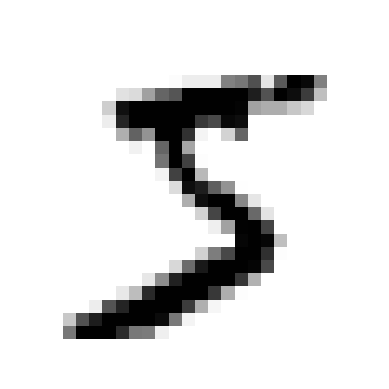

In [10]:
plt.imshow(some_digit_image, cmap=mpl.colormaps['binary'], interpolation='nearest')
plt.axis('off')
plt.show()

In [11]:
# Label for the above example tell us this is a '5'
y[0]

'5'

In [12]:
# Cast label from string type to integer type
import numpy as np
y = y.astype(np.uint8)

In [13]:
# Assign images to test set (first 60,000 images) and training set (remaining 10,000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# Train a binary classifier (5-detector)
# True for all 5s, False for all other digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
# Use Stochastic Gradient Descent (SGD) classifier
# Capable of handling large datasets by dealing with training instances independently
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) # Fit training set and targets into classifier 

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit]) # Correctly predicts some_digit as being a 5

array([ True])

In [17]:
# Measure accuracy of binary classifier using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test, y_test_5, cv=3, scoring='accuracy') # Split into three K-folds

array([0.95110978, 0.95439544, 0.96879688])

In [18]:
# # Measure accuracy of binary classifier using cross-validation with Startified K-folds
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # Creates a clone of the classifier
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds) # Train clone on training folds
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [19]:
# Compute the confusion matrix
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Confusion matrix results composed of following array:
array(true negatives (TN), false positives (FP),
      false negatives (FN), true positives (TP), data type)

e.g. 53982 non-5 images correctly classified as not 5s, 687 non-5 images incorrectly classified as 5s, 1891 images of 5 incorrectly classified as non-5, 3530 images of 5 correctly classified as a 5

In [23]:
# Precision score (precision = TP / (TP + FP)) is the accuracy of the positive predictions
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [24]:
# Recall score (recall = TP / (TP + FN)) is the ratio of positive instances that are correctly detected
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
# F1 score (F1 = TP / (TP + ((FN + FP) / 2))) is the harmonic mean of precision and recall (gives more wight to lower values)
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# Classifier using pipeline and scaling the input
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_clf = make_pipeline(StandardScaler(), 
                        SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))

sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])